# Herkunftsländer der Arbeitnehmer

In [1]:
import cleanup
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from shapely.geometry import Point, Polygon
plt.style.use('../own_style.mplstyle')
from geopandas import GeoDataFrame
import geopandas
import mapclassify
import modules



In [2]:
#cleanup.generate_cleaned_df()


In [3]:

col_list = ["country_of_citizenship"]
visas_df = pd.read_csv('../data/us_perm_visas_cleaned.csv', usecols=col_list)


In [4]:
visas_df = visas_df["country_of_citizenship"].value_counts()[:25]

In [5]:
visas_df.head(25)

INDIA             205158
CHINA              28861
SOUTH KOREA        24761
CANADA             14804
MEXICO              8961
PHILIPPINES         8631
UNITED KINGDOM      4972
TAIWAN              4173
PAKISTAN            3962
FRANCE              3173
NEPAL               3047
JAPAN               2970
BRAZIL              2919
VENEZUELA           2738
TURKEY              2551
RUSSIA              2524
GERMANY             2364
IRAN                2356
VIETNAM             2290
ITALY               1948
ISRAEL              1914
COLOMBIA            1843
AUSTRALIA           1696
UKRAINE             1502
SPAIN               1447
Name: country_of_citizenship, dtype: int64

In [6]:
web_table = pd.read_html('https://www.iban.com/country-codes', match='Country', keep_default_na=False)
states_abbreviations_df = web_table[0]

In [7]:

states_abbreviations_df 

,Country,Alpha-2 code,Alpha-3 code,Numeric
0,Afghanistan,AF,AFG,4
1,Åland Islands,AX,ALA,248
2,Albania,AL,ALB,8
3,Algeria,DZ,DZA,12
4,American Samoa,AS,ASM,16
...,...,...,...,...
244,Wallis and Futuna,WF,WLF,876
245,Western Sahara,EH,ESH,732
246,Yemen,YE,YEM,887
247,Zambia,ZM,ZMB,894


In [8]:

states_abbreviations_df["Country"] = states_abbreviations_df["Country"].str.upper()

In [9]:
states_abbreviations_df


,Country,Alpha-2 code,Alpha-3 code,Numeric
0,AFGHANISTAN,AF,AFG,4
1,ÅLAND ISLANDS,AX,ALA,248
2,ALBANIA,AL,ALB,8
3,ALGERIA,DZ,DZA,12
4,AMERICAN SAMOA,AS,ASM,16
...,...,...,...,...
244,WALLIS AND FUTUNA,WF,WLF,876
245,WESTERN SAHARA,EH,ESH,732
246,YEMEN,YE,YEM,887
247,ZAMBIA,ZM,ZMB,894


In [10]:

visas_df = visas_df.to_frame()

In [11]:
visas_df.reset_index(level=0, inplace=True)


In [12]:
visas_df


,index,country_of_citizenship
0,INDIA,205158
1,CHINA,28861
2,SOUTH KOREA,24761
3,CANADA,14804
4,MEXICO,8961
5,PHILIPPINES,8631
6,UNITED KINGDOM,4972
7,TAIWAN,4173
8,PAKISTAN,3962
9,FRANCE,3173


In [13]:
visas_df = visas_df.merge(states_abbreviations_df, left_on='index', right_on="Country")

In [14]:
visas_df.head(50)

,index,country_of_citizenship,Country,Alpha-2 code,Alpha-3 code,Numeric
0,INDIA,205158,INDIA,IN,IND,356
1,CHINA,28861,CHINA,CN,CHN,156
2,CANADA,14804,CANADA,CA,CAN,124
3,MEXICO,8961,MEXICO,MX,MEX,484
4,PAKISTAN,3962,PAKISTAN,PK,PAK,586
5,FRANCE,3173,FRANCE,FR,FRA,250
6,NEPAL,3047,NEPAL,NP,NPL,524
7,JAPAN,2970,JAPAN,JP,JPN,392
8,BRAZIL,2919,BRAZIL,BR,BRA,76
9,TURKEY,2551,TURKEY,TR,TUR,792


In [15]:
#web_table2 = pd.read_html('https://developers.google.com/public-data/docs/canonical/countries_csv', match='country', keep_default_na=False)

In [16]:
#web_table2 = web_table2[0]

In [17]:

#web_table2

In [18]:
#visas_df = visas_df.merge(web_table2, left_on='Code', right_on="country")

In [19]:
visas_df

,index,country_of_citizenship,Country,Alpha-2 code,Alpha-3 code,Numeric
0,INDIA,205158,INDIA,IN,IND,356
1,CHINA,28861,CHINA,CN,CHN,156
2,CANADA,14804,CANADA,CA,CAN,124
3,MEXICO,8961,MEXICO,MX,MEX,484
4,PAKISTAN,3962,PAKISTAN,PK,PAK,586
5,FRANCE,3173,FRANCE,FR,FRA,250
6,NEPAL,3047,NEPAL,NP,NPL,524
7,JAPAN,2970,JAPAN,JP,JPN,392
8,BRAZIL,2919,BRAZIL,BR,BRA,76
9,TURKEY,2551,TURKEY,TR,TUR,792


In [20]:
#visas_df["latitude"] = visas_df["latitude"].astype("float")
#visas_df["longitude"] = visas_df["longitude"].astype("float")

In [21]:
#fig, ax = plt.subplots(figsize=(10, 6))
#ax.scatter(visas_df["latitude"], visas_df["longitude"])
#ax.axis('equal')
#plt.show()

In [22]:

#visas_df["country_of_citizenship"] = visas_df["country_of_citizenship"].astype(("float"))

In [23]:
visas_df = GeoDataFrame(visas_df)

In [24]:
visas_df


,index,country_of_citizenship,Country,Alpha-2 code,Alpha-3 code,Numeric
0,INDIA,205158,INDIA,IN,IND,356
1,CHINA,28861,CHINA,CN,CHN,156
2,CANADA,14804,CANADA,CA,CAN,124
3,MEXICO,8961,MEXICO,MX,MEX,484
4,PAKISTAN,3962,PAKISTAN,PK,PAK,586
5,FRANCE,3173,FRANCE,FR,FRA,250
6,NEPAL,3047,NEPAL,NP,NPL,524
7,JAPAN,2970,JAPAN,JP,JPN,392
8,BRAZIL,2919,BRAZIL,BR,BRA,76
9,TURKEY,2551,TURKEY,TR,TUR,792


In [25]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

In [26]:
modules.print_full(world)

        pop_est                continent                      name iso_a3  \
0        920938                  Oceania                      Fiji    FJI   
1      53950935                   Africa                  Tanzania    TZA   
2        603253                   Africa                 W. Sahara    ESH   
3      35623680            North America                    Canada    CAN   
4     326625791            North America  United States of America    USA   
5      18556698                     Asia                Kazakhstan    KAZ   
6      29748859                     Asia                Uzbekistan    UZB   
7       6909701                  Oceania          Papua New Guinea    PNG   
8     260580739                     Asia                 Indonesia    IDN   
9      44293293            South America                 Argentina    ARG   
10     17789267            South America                     Chile    CHL   
11     83301151                   Africa           Dem. Rep. Congo    COD   

In [27]:
world.iloc[43, world.columns.get_loc('iso_a3')] = "FRA"

In [28]:
modules.print_full(world)

        pop_est                continent                      name iso_a3  \
0        920938                  Oceania                      Fiji    FJI   
1      53950935                   Africa                  Tanzania    TZA   
2        603253                   Africa                 W. Sahara    ESH   
3      35623680            North America                    Canada    CAN   
4     326625791            North America  United States of America    USA   
5      18556698                     Asia                Kazakhstan    KAZ   
6      29748859                     Asia                Uzbekistan    UZB   
7       6909701                  Oceania          Papua New Guinea    PNG   
8     260580739                     Asia                 Indonesia    IDN   
9      44293293            South America                 Argentina    ARG   
10     17789267            South America                     Chile    CHL   
11     83301151                   Africa           Dem. Rep. Congo    COD   

In [29]:
visas_df=pd.merge(world,visas_df,left_on='iso_a3', right_on='Alpha-3 code')

In [30]:
visas_df

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,index,country_of_citizenship,Country,Alpha-2 code,Alpha-3 code,Numeric
0,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",CANADA,14804,CANADA,CA,CAN,124
1,124574795,North America,Mexico,MEX,2307000.0,"POLYGON ((-117.12776 32.53534, -115.99135 32.6...",MEXICO,8961,MEXICO,MX,MEX,484
2,207353391,South America,Brazil,BRA,3081000.0,"POLYGON ((-53.37366 -33.76838, -53.65054 -33.2...",BRAZIL,2919,BRAZIL,BR,BRA,76
3,47698524,South America,Colombia,COL,688000.0,"POLYGON ((-66.87633 1.25336, -67.06505 1.13011...",COLOMBIA,1843,COLOMBIA,CO,COL,170
4,67106161,Europe,France,FRA,2699000.0,"MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3...",FRANCE,3173,FRANCE,FR,FRA,250
5,8299706,Asia,Israel,ISR,297000.0,"POLYGON ((35.71992 32.70919, 35.54567 32.39399...",ISRAEL,1914,ISRAEL,IL,ISR,376
6,1281935911,Asia,India,IND,8721000.0,"POLYGON ((97.32711 28.26158, 97.40256 27.88254...",INDIA,205158,INDIA,IN,IND,356
7,29384297,Asia,Nepal,NPL,71520.0,"POLYGON ((88.12044 27.87654, 88.04313 27.44582...",NEPAL,3047,NEPAL,NP,NPL,524
8,204924861,Asia,Pakistan,PAK,988200.0,"POLYGON ((77.83745 35.49401, 76.87172 34.65354...",PAKISTAN,3962,PAKISTAN,PK,PAK,586
9,44033874,Europe,Ukraine,UKR,352600.0,"POLYGON ((31.78599 52.10168, 32.15944 52.06125...",UKRAINE,1502,UKRAINE,UA,UKR,804


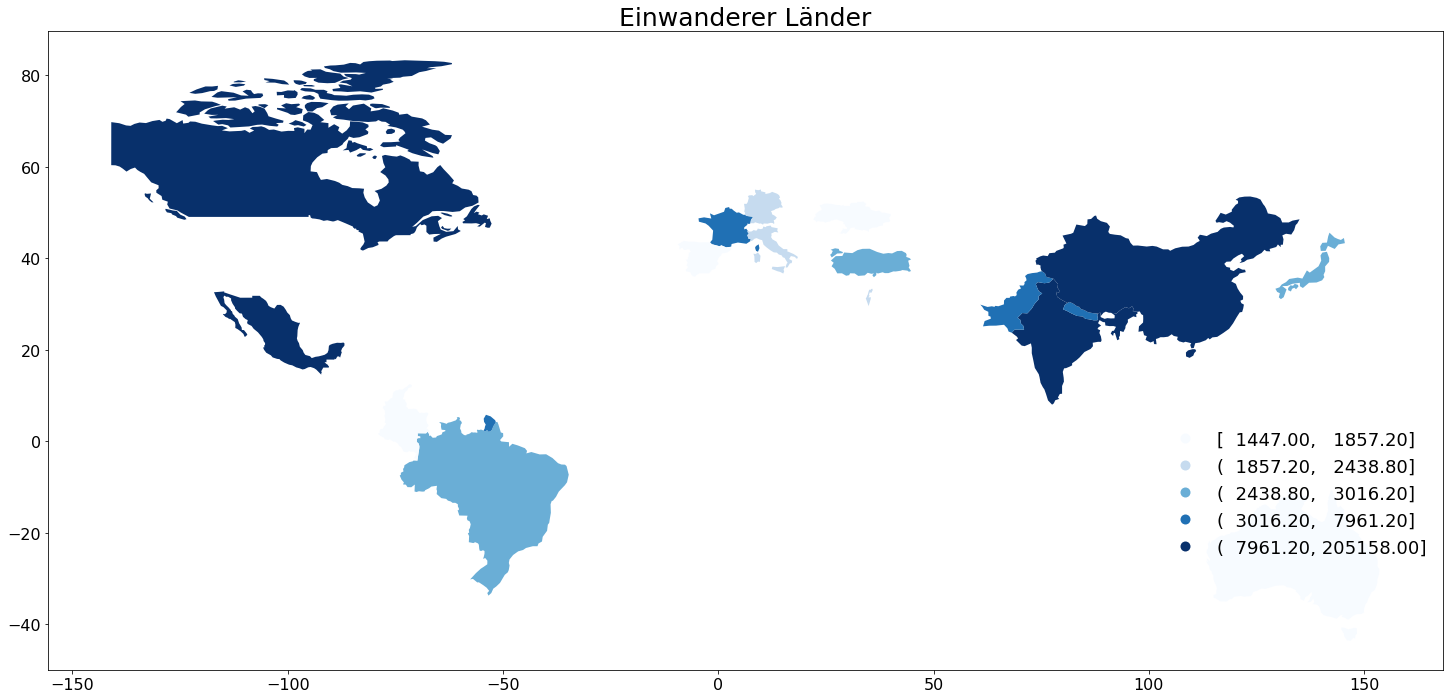

In [31]:
# plot confirmed cases world map
visas_df.plot(column='country_of_citizenship', scheme="quantiles",
           figsize=(25, 20),
           legend=True,cmap='Blues',legend_kwds=dict(loc='upper right',
                            bbox_to_anchor=(1.0, .4),
                            fontsize=18,
                            
                            frameon=False))

plt.title('Einwanderer Länder',fontsize=25)


# add countries names and numbers
#for i in range(0,10):
#    plt.text(float(visas_df.longitude[i]),float(visas_df.latitude[i]),"{}\n{}".format(visas_df.index[i],visas_df.country_of_citizenship[i]),size=10)

plt.show()

In [32]:
#https://melaniesoek0120.medium.com/data-visualization-how-to-plot-a-map-with-geopandas-in-python-73b10dcd4b4b